In [37]:
import numpy as np
from sklearn.model_selection import train_test_split # to split data into train and test
from sklearn.metrics import classification_report, confusion_matrix # to evaluate the model
from sklearn.linear_model import LogisticRegression # to build the model
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
data = pd.read_csv('./datasets/titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


/var/folders/94/bpbcn0dx68bfs5pth93xld2m0000gn/T/ipykernel_2366/2048107335.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Age'] = data['Age'].fillna(method='ffill')


<Axes: >

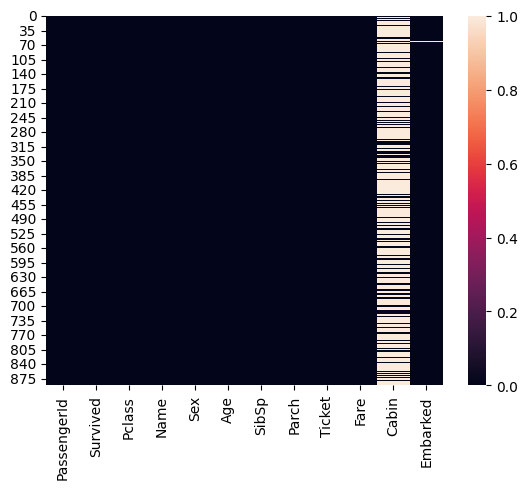

In [39]:
data['Age'] = data['Age'].fillna(method='ffill')
sns.heatmap(data.isnull())

In [40]:
#Handling missing values
data.drop('Cabin', axis=1, inplace = True)
data.dropna(inplace=True)

In [41]:
sex = pd.get_dummies(data['Sex'])
embark = pd.get_dummies(data['Embarked'])

In [42]:
data.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
data = pd.concat([data, sex, embark], axis=1)

In [43]:
#Building a Logistic Regression Model
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived', axis=1),
                                data['Survived'], test_size=0.3)

In [44]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
predictions = model.predict(X_test)
predictions

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0])

In [46]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       165
           1       0.77      0.75      0.76       102

    accuracy                           0.82       267
   macro avg       0.81      0.80      0.80       267
weighted avg       0.82      0.82      0.82       267

[[142  23]
 [ 26  76]]
